Pyber Ride Sharing Analysis

Roughly 70% of all rides and total fare value come from Urban riders.
Rural riders tend to take significantly higher cost, albeit fewer, trips than Urban or Suburban riders.
While comprising of roughly 35% of all rides and fares, Suburban and Rural cities afford only 22% of Pyber's total driver population. There may be a strategic opportunity here to boost driver counts in these regions to enhance market share.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# read the csv files into pandas as dataframes
filepath = os.path.join("raw_data","city_data.csv")
city_df = pd.read_csv(filepath)
filepath2 = os.path.join("raw_data","ride_data.csv")
ride_df = pd.read_csv(filepath2)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
# merge the above dataframes and sort by city
merge_df = pd.merge(city_df,ride_df,on="city",how="outer")
merge_df = merge_df.sort_values("city")
merge_df.head()

,city,driver_count,type,date,fare,ride_id
1594,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1595,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
1624,Alvarezhaven,21,Urban,2016-07-04 04:28:22,33.31,306054352684
1623,Alvarezhaven,21,Urban,2016-01-27 10:38:40,6.72,6152998520191
1622,Alvarezhaven,21,Urban,2016-05-16 15:33:14,6.45,8939751998750


In [5]:
# slice the city df by Urban city type
city_urban = city_df.loc[city_df["type"]=="Urban"]
city_urban.sort_values("city")
# driver count per city for urban city type
drivers_urban = city_urban["driver_count"].tolist()
drivers_urban = [each*5 for each in drivers_urban]
city_urban.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
# slice the city df by Rural city type
city_rural = city_df.loc[city_df["type"]=="Rural"]
city_rural.sort_values("city")
# driver count per city by Rural type
drivers_rural = city_rural["driver_count"].tolist()
drivers_rural = [each*5 for each in drivers_rural]
drivers_rural
city_rural.head()

,city,driver_count,type
108,South Elizabethmouth,3,Rural
109,East Troybury,3,Rural
110,Kinghaven,3,Rural
111,New Johnbury,6,Rural
112,Erikport,3,Rural


In [7]:
# slice the city df by suburban city type
city_sub = city_df.loc[city_df["type"]=="Suburban"]
city_sub.sort_values("city")
# driver count per city by suburban type
drivers_sub= city_sub["driver_count"].tolist()
drivers_sub = [each*5 for each in drivers_sub]
city_sub.head()

,city,driver_count,type
66,Carrollbury,4,Suburban
67,Williamchester,26,Suburban
68,New Michelleberg,9,Suburban
69,West Evan,4,Suburban
70,South Gracechester,19,Suburban


In [8]:
# slice the merged df by urban type
urban_df = merge_df.loc[merge_df["type"]=="Urban"]
urban_df.sort_values("city")
# groupby city
group_urban = urban_df.groupby("city")
# no of rides per city-Urban
rides_city_urban = group_urban["type"].count()
rides_city_urban
# average fare per city-Urban
avgfare_urban = round(group_urban["fare"].mean(),2)
avgfare_urban

city
Alvarezhaven         23.93
Alyssaberg           20.61
Antoniomouth         23.63
Aprilchester         21.98
Arnoldview           25.11
Carrollfort          25.40
Davidtown            22.98
Davistown            21.50
East Douglas         26.17
East Erin            24.48
Edwardsbury          26.88
Eriktown             25.48
Fosterside           23.03
Jacobfort            24.78
Kellershire          24.17
Kelseyland           21.81
Kimberlychester      22.95
Lake Jeffreyland     27.33
Lake Jennaton        25.35
Lake Sarashire       26.61
Lake Stevenbury      24.66
Lisatown             22.23
Lisaville            28.43
Maryside             26.84
Mooreview            29.52
New Aaron            26.86
New Andreamouth      24.97
New Christine        24.16
New David            27.08
New Jeffrey          24.13
                     ...  
Port Martinberg      22.33
Port Samantha        27.05
Prattfurt            23.35
Rodriguezburgh       21.33
Russellport          22.49
Sandymouth           23

In [9]:
# slice the merged df by rural type
rural_df = merge_df.loc[merge_df["type"]=="Rural"]
rural_df.sort_values("city")
# groupby city
group_rural = rural_df.groupby("city")
# no of rides per city-Rural
rides_city_rural = group_rural["type"].count()
rides_city_rural
# average fare per city-Rural
avgfare_rural = round(group_rural["fare"].mean(),2)
avgfare_rural

city
East Leslie             33.66
East Stephen            39.05
East Troybury           33.24
Erikport                30.04
Hernandezshire          32.00
Horneland               21.48
Jacksonfort             32.01
Kennethburgh            36.93
Kinghaven               34.98
Manuelchester           49.62
Matthewside             43.53
New Johnbury            35.04
North Whitney           38.15
Shelbyhaven             34.83
South Elizabethmouth    28.70
South Joseph            38.98
Stevensport             31.95
West Kevintown          21.53
Name: fare, dtype: float64

In [10]:
# slice the merged df by Suburban type
sub_df = merge_df.loc[merge_df["type"]=="Suburban"]
sub_df.sort_values("city")
# groupby city
group_sub = sub_df.groupby("city")
# no of rides per city-Suburban
rides_city_sub = group_sub["type"].count()
rides_city_sub
# average fare per city-Suburban
avgfare_sub = round(group_sub["fare"].mean(),2)
avgfare_sub


city
Anitamouth              37.32
Campbellport            33.71
Carrollbury             36.61
Clarkstad               31.05
Conwaymouth             34.59
East Cherylfurt         31.42
East Jenniferchester    32.60
Floresberg              32.31
Jasonfort               27.83
Jeffreyton              33.17
Johnland                28.75
Kyleton                 31.17
Lake Brenda             29.79
Martinmouth             30.50
New Brandonborough      31.90
New Cindyborough        31.03
New Jessicamouth        32.81
New Lynn                28.45
New Michelleberg        24.97
New Samanthaside        34.07
North Tara              32.39
North Tracyfort         26.86
Paulfort                31.14
Port Alexandria         26.32
Port Guytown            28.24
Port James              31.81
Port Jose               31.19
Port Michelleview       26.72
Rodriguezview           31.87
Sarahview               33.86
South Gracechester      31.35
South Jennifer          29.80
South Shannonborough    26.52
Thoma

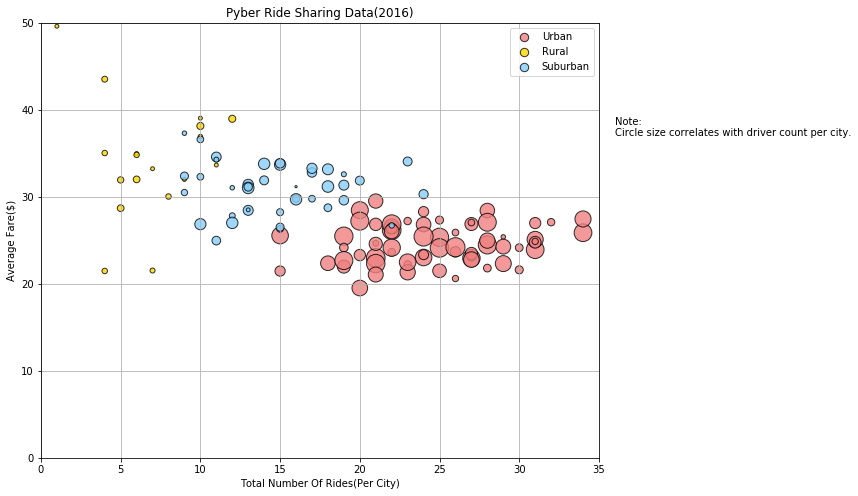

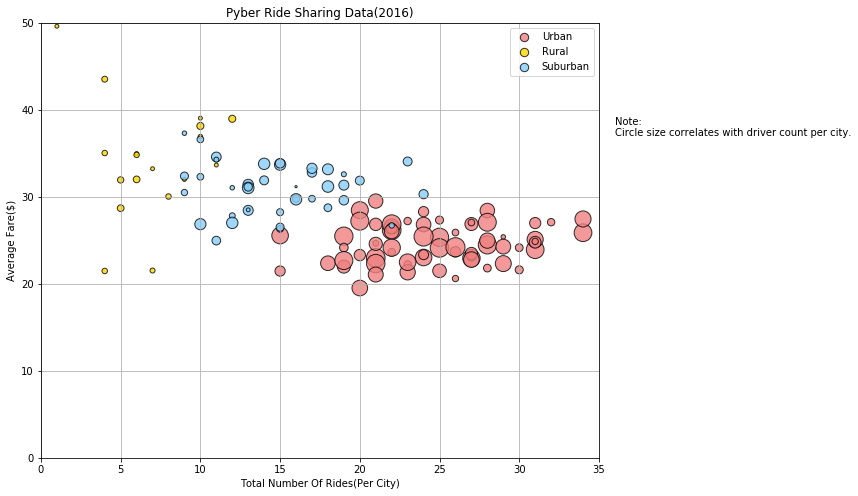

In [35]:
# create scatterplots for each city type dataframes
# scatter plot for urban
fig = plt.figure(figsize=(10,8))
plt.grid(True)
sct_urban = plt.scatter(x=rides_city_urban,y=avgfare_urban,marker="o",
                        color="lightcoral",s=10*drivers_urban,edgecolor='black', linewidths=1,alpha=0.8,label="Urban")
# scatter plot for rural
sct_rural = plt.scatter(x=rides_city_rural,y=avgfare_rural,marker="o",
                        color="gold",s=10*drivers_rural,edgecolor='black',linewidths=1,alpha=0.8,label="Rural")
# scatter plot for Suburban
sct_sub = plt.scatter(x=rides_city_sub,y=avgfare_sub,marker="o",
                      color="lightskyblue",s=10*drivers_sub,edgecolor='black',linewidths=1,alpha=0.8,label="Suburban")

# pass the legends and set equal sizes for legend points
lgnd = plt.legend(handles=[sct_urban,sct_rural,sct_sub],loc="best")
lgnd.legendHandles[0]._sizes = [70]
lgnd.legendHandles[1]._sizes = [70]
lgnd.legendHandles[2]._sizes = [70]

# set annotation texts and their positions on the chart
plt.text(36,37,'Note:\nCircle size correlates with driver count per city.',fontsize=10)


# setting x and y limits
plt.xlim(0,35)
plt.ylim(0,50)

# axis labels and title

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number Of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.savefig("mypyber.png",bbox_inches='tight')

plt.show()


In [12]:
# pie charts
# % of total fares by city type
# % of total fare for urban
# total fare for all the city types combined
total_fare = round(ride_df["fare"].sum(),2)
# total fare for Urban
grouped_type = merge_df.groupby("type")
total_fare_type = grouped_type["fare"].sum()
# % total fare for each city type
percent_fare_type = [(x/total_fare)*100 for x in total_fare_type]
percent_fare_type


[6.6849998845271221, 31.948580476976847, 62.965459783938456]

In [13]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
percent_fare_type

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "yellowgreen"]

# Tells matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.25]
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(percent_fare_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% Of Total Fares (Per City Type)")

In [14]:
# a pie chart with equal axes
plt.axis("equal")

(-1.2736209842843724,
 1.1218596353118722,
 -1.123175967896636,
 1.3197875676276893)

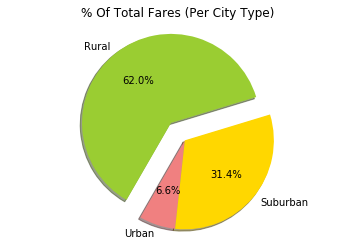

In [15]:
# % of Total fares by city Type
plt.show()

In [16]:
# % of total rides by city type
# Total rides for all cities combined
total_rides = ride_df["ride_id"].count()

# groupby city type
total_rides_type = grouped_type["ride_id"].count()
total_rides_type

# % total rides for each city type
percent_rides_type = [(x/total_rides)*100 for x in total_rides_type]
percent_rides_type

[5.2631578947368416, 27.663157894736841, 68.421052631578945]

In [17]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
percent_rides_type

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "yellowgreen"]

# Tells matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.25]
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(percent_rides_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% Of Total Rides(Per City Type)")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.2274853381426716,
 1.1045953813600933,
 -1.1204121188539438,
 1.3367838652899937)

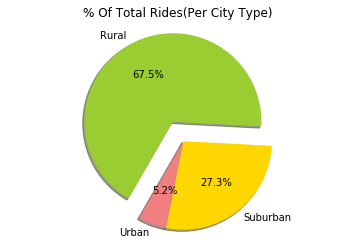

In [18]:
# % of Total rides Per city Type
plt.show()

In [19]:
# % of total drivers per City Type
# Total drivers for all cities combined
total_drivers = city_df["driver_count"].sum()

# total drivers for urban
# groupby city type and city
grouped_city_type = city_df.groupby("type")
total_drivers_type = grouped_city_type["driver_count"].sum()

# % total drivers for each city type
percent_drivers_type = [(x/total_drivers)*100 for x in total_drivers_type]
percent_drivers_type

[3.1054045983875787, 19.050462824723798, 77.844132576888626]

In [20]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
percent_drivers_type

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "yellowgreen"]

# Tells matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.25]
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(percent_drivers_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% Of Total Drivers (Per City Type)")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1481889767632465,
 1.0627372664590979,
 -1.1307943972861136,
 1.3644098122476334)

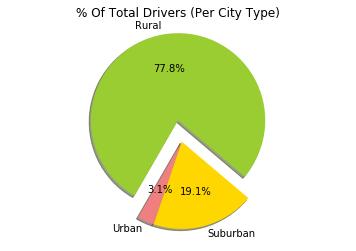

In [21]:
# % of Total drivers Per city Type
plt.show()